In [1]:
# Define task

from _collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np

import sys
import os

root = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(root)

from scipy.ndimage import gaussian_filter
from sklearn.preprocessing import normalize
import seaborn as sns
import warnings
from datasets import sf_inputs_discrete

/Users/chingfang/Code/sr-project/datasets/sf_inputs_discrete.py:19: UserWarning: Emily's experimental data could not be loaded.
  warnings.warn("Emily's experimental data could not be loaded.")
/Users/chingfang/Code/sr-project/datasets/inputs.py:12: UserWarning: Emily's experimental data could not be loaded.
  warnings.warn("Emily's experimental data could not be loaded.")


# Scatterplot of parameter sweep

In [4]:
spatial_sigmas = [0.0, 1.0, 2.0, 3.0]
sparsity_range = [[0.001, 0.2], [0.001, 0.1], [0.001, 0.04], [0.001, 0.023]]
spatial_sigmas.extend([
    0.25,
    0.5,
    1.25,
    1.5,
    1.75,
    2.25,
    2.5,
    2.75,
    3.25
    ])
sparsity_range.extend([
    [0.001, 0.19], # 0.25
    [0.001, 0.15], # 0.5
    [0.001, 0.09], # 1.25
    [0.001, 0.05], # 1.5
    [0.001, 0.045], # 1.75
    [0.001, 0.037], # 2.25
    [0.001, 0.03], # 2.5
    [0.001, 0.025], # 2.75
    [0.001, 0.021], # 3.25
    ])

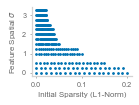

In [23]:
sparsities = []
sigmas = []

plt.figure(figsize=(2., 1.5))
for idx, spatial_sigma in enumerate(spatial_sigmas):
    _range = sparsity_range[idx]
    sparsity_ps = np.linspace(_range[0], _range[1], num=20, endpoint=True)
    sparsities.extend(sparsity_ps.tolist())
    sigmas.extend([spatial_sigma]*sparsity_ps.size)
plt.scatter(sparsities, sigmas, s=3)
plt.xlabel('Initial Sparsity (L1-Norm)')
plt.ylabel('Feature Spatial $\sigma$')
plt.tight_layout()
plt.savefig('../figures/S5a.png', dpi=300, transparent=True)
plt.show()

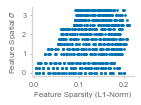

In [20]:
sparsities = []
sigmas = []
plt.figure(figsize=(2,1.5))
for idx, spatial_sigma in enumerate(spatial_sigmas):
    _range = sparsity_range[idx]
    sparsity_ps = np.linspace(_range[0], _range[1], num=20, endpoint=True)
    for sparsity_p in sparsity_ps:
        for _ in range(3):
            feature_maker_kwargs = {
                'feature_dim': num_states,
                'feature_type': 'correlated_distributed',
                'feature_vals_p': [1-sparsity_p, sparsity_p],
                'spatial_sigma': spatial_sigma,
                'gaussian_truncate': 1.
                }
            dataset_config = {
                'num_steps': num_steps,
                'feature_maker_kwargs': feature_maker_kwargs,
                'num_states': num_states
            }
            dset = dataset(**dataset_config)
            sigmas.append(spatial_sigma)
            sparsities.append(dset.feature_maker.post_smooth_sparsity)
plt.scatter(sparsities, sigmas, s=3.)
plt.xlabel('Feature Sparsity (L1-Norm)')
plt.ylabel('Feature Spatial $\sigma$')
plt.tight_layout()
plt.savefig('../figures/S5b.png', dpi=300, transparent=True)
plt.show()

# Example Feature

In [56]:
arena_length = 14
num_states = arena_length**2
num_steps= 5000
sparsity_p = 0.015 #0.022
spatial_sigma = 2.
feature_maker_kwargs = {
    'feature_dim': num_states,
    'feature_type': 'correlated_distributed',
    'feature_vals_p': [1-sparsity_p, sparsity_p],
    'spatial_sigma': spatial_sigma,
    'gaussian_truncate': 1.
    }
dataset_config = {
    'num_steps': num_steps,
    'feature_maker_kwargs': feature_maker_kwargs,
    'num_states': num_states
}
dataset = sf_inputs_discrete.Sim2DWalk
dset = dataset(**dataset_config)

In [57]:
features = dset.feature_maker.feature_map # (features, states)

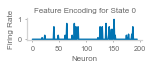

In [58]:
plt.figure(figsize=(2.25,1.))
plt.plot(features[:,0])
plt.xlabel('Neuron')
plt.ylabel('Firing Rate')
plt.title('Feature Encoding for State 0')
plt.tight_layout()
plt.savefig('../figures/S5c.png', dpi=300, transparent=True)
plt.show()

In [59]:
dset.feature_maker.post_smooth_sparsity

0.11378725904934445

# Plot correlation

In [50]:
corr = np.zeros((arena_length, arena_length))
ref_i = arena_length//2; ref_j = arena_length//2
ref_idx = ref_i*arena_length + ref_j

for i in range(arena_length):
    for j in range(arena_length):
        idx = i*arena_length + j
        c = np.dot(features[:,idx], features[:,ref_idx])
        corr[i,j] = c

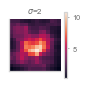

In [51]:
plt.figure(figsize=(1.25,1.25))
plt.imshow(corr)
plt.title('$\sigma$=2')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('../figures/S5d.png', dpi=300, transparent=True)
plt.show()

In [53]:
arena_length = 14
num_states = arena_length**2
num_steps= 5000
sparsity_p = 0.015 #0.022
spatial_sigma = 0.
feature_maker_kwargs = {
    'feature_dim': num_states,
    'feature_type': 'correlated_distributed',
    'feature_vals_p': [1-sparsity_p, sparsity_p],
    'spatial_sigma': spatial_sigma,
    'gaussian_truncate': 1.
    }
dataset_config = {
    'num_steps': num_steps,
    'feature_maker_kwargs': feature_maker_kwargs,
    'num_states': num_states
}
dataset = sf_inputs_discrete.Sim2DWalk
dset = dataset(**dataset_config)
features = dset.feature_maker.feature_map # (features, states)
corr = np.zeros((arena_length, arena_length))
ref_i = arena_length//2; ref_j = arena_length//2
ref_idx = ref_i*arena_length + ref_j

for i in range(arena_length):
    for j in range(arena_length):
        idx = i*arena_length + j
        c = np.dot(features[:,idx], features[:,ref_idx])
        corr[i,j] = c

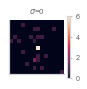

In [54]:
plt.figure(figsize=(1.25,1.25))
plt.imshow(corr)
plt.title('$\sigma$=0')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('../figures/S5e.png', dpi=300, transparent=True)
plt.show()